# Retail Sales Analysis

## Project goal:

This project analyzes retail sales data from 2024 to 2025 to identify key trends across cities, departments, customer profiles, and sales periods, enabling data-driven decisions in marketing, operations, and customer strategy.

# Raw data loading and cleaning

In [ ]:
import pandas as pd
df = pd.read_csv("/content/retail_customer_sales_data.csv")
df.head(10)

,date,customer_id,city,customer_type,service,department,sales_amount,margin_percent,sale_type,customer_source,package_type
0,2024-01-01 00:00:00,8270,Houston,New,Consultation,Clothing,232.13,29.63,Online,Facebook,Standard
1,2024-01-01 01:00:00,1860,Houston,New,Consultation,Grocery,NaN,NaN,In-store,Referral,Standard
2,2024-01-01 02:00:00,6390,Phoenix,Returning,Consultation,Clothing,437.76,25.03,Online,Instagram,Standard
3,2024-01-01 03:00:00,6191,Los Angeles,Returning,Consultation,Pharmacy,NaN,NaN,Online,Referral,Gold
4,2024-01-01 04:00:00,6734,Houston,New,Basic,Pharmacy,168.66,9.94,In-store,Facebook,Gold
5,2024-01-01 05:00:00,7265,New York,New,Basic,Pharmacy,NaN,NaN,In-store,Facebook,Standard
6,2024-01-01 06:00:00,1466,Phoenix,Returning,Basic,Clothing,580.54,6.1,Online,Instagram,Standard
7,2024-01-01 07:00:00,5426,Houston,Returning,Consultation,Pharmacy,NaN,NaN,Online,Referral,Standard
8,2024-01-01 08:00:00,6578,New York,Returning,Consultation,Clothing,five hundred,5.04,Online,Facebook,Standard
9,2024-01-01 09:00:00,9322,New York,Returning,Premium,Clothing,437.93,thirty,In-store,Referral,Standard


In [ ]:
# Checking for null values
df.isnull().sum()

,0
date,0
customer_id,0
city,0
customer_type,37
service,36
department,0
sales_amount,10
margin_percent,13
sale_type,0
customer_source,0


In [ ]:
# Data Cleaning

# 1. Stripping whitespace and standardizing capitalization for selected columns
columns_to_clean = ['city', 'customer_type', 'service', 'department', 'sale_type', 'customer_source']
for col in columns_to_clean:
    df[col] = df[col].astype(str).str.strip().str.title()

# 2. Converting numeric columns with errors to numbers
df['sales_amount'] = pd.to_numeric(df['sales_amount'], errors='coerce')
df['margin_percent'] = pd.to_numeric(df['margin_percent'], errors='coerce')

# 3. Converting date column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# 4. Handling missing values
# Filling numeric columns with mean
df['sales_amount'] = df['sales_amount'].fillna(df['sales_amount'].mean())
df['margin_percent'] = df['margin_percent'].fillna(df['margin_percent'].mean())

# Filling categorical columns with mode
df['customer_type'] = df['customer_type'].fillna(df['customer_type'].mode()[0])
df['service'] = df['service'].fillna(df['service'].mode()[0])

# 5. Removing duplicates
df.drop_duplicates(inplace=True)

# 6. Reseting index
df.reset_index(drop=True, inplace=True)


In [ ]:
# Saving the cleaned file for further analysis
df.to_csv("cleaned_retail_sales.csv", index=False)

# Exploratory Data Analysis and Visualization



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the cleaned dataset
df1 = pd.read_csv("/content/cleaned_retail_sales.csv")

# Setting plot style
sns.set(style="whitegrid")

# 1. Basic Info & Summary Stats
print("Dataset Info:")
df1.info()
print("\nSummary Statistics:")
df1.describe(include='all')


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             10001 non-null  object 
 1   customer_id      10001 non-null  object 
 2   city             10001 non-null  object 
 3   customer_type    10001 non-null  object 
 4   service          10001 non-null  object 
 5   department       10001 non-null  object 
 6   sales_amount     10001 non-null  float64
 7   margin_percent   10001 non-null  float64
 8   sale_type        10001 non-null  object 
 9   customer_source  10001 non-null  object 
 10  package_type     10001 non-null  object 
dtypes: float64(2), object(9)
memory usage: 859.6+ KB

Summary Statistics:


,date,customer_id,city,customer_type,service,department,sales_amount,margin_percent,sale_type,customer_source,package_type
count,10001,10001,10001,10001,10001,10001,10001.000000,10001.000000,10001,10001,10001
unique,9998,6027,5,3,4,4,NaN,NaN,2,4,3
top,2024-01-05 13:00:00,3711,Los Angeles,New,Consultation,Clothing,NaN,NaN,Online,Facebook,Standard
freq,2,6,4989,6524,5990,5467,NaN,NaN,7777,4074,6513
mean,NaN,NaN,NaN,NaN,NaN,NaN,523.593594,17.463782,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,274.647433,7.207853,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,50.020000,5.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,287.560000,11.190000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,522.210000,17.480000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,762.730000,23.680000,NaN,NaN,NaN


In [ ]:
# Unique values per column
df1.nunique()

,0
date,9998
customer_id,6027
city,5
customer_type,3
service,4
department,4
sales_amount,9503
margin_percent,2450
sale_type,2
customer_source,4


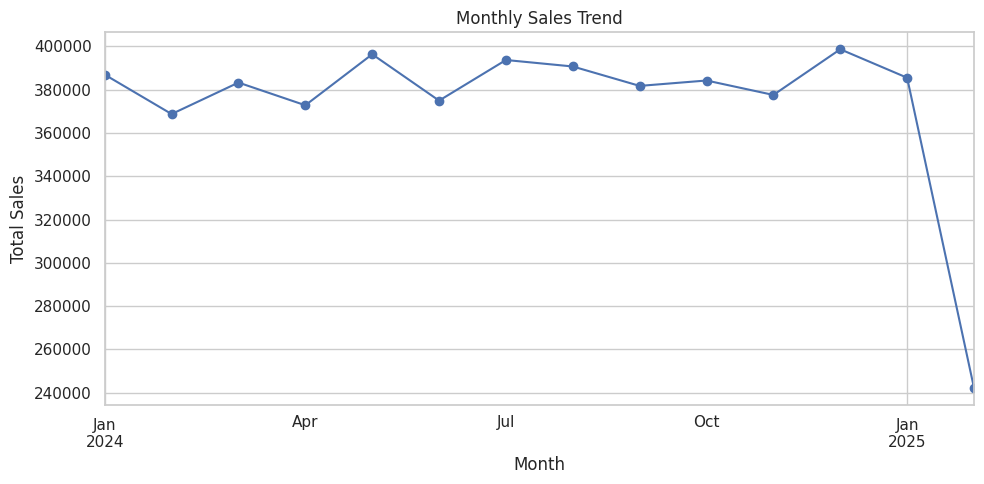

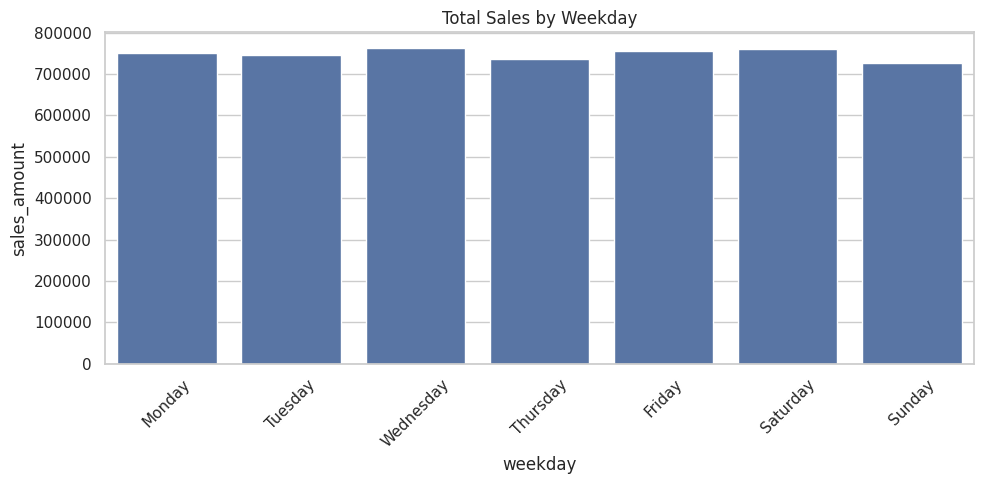

In [ ]:
# Time Series Analysis
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')
df1['month'] = df1['date'].dt.to_period('M')
df1['weekday'] = df1['date'].dt.day_name()

# Monthly sales trend
monthly_sales = df1.groupby('month')['sales_amount'].sum()
plt.figure(figsize=(10, 5))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

# Sales by weekday
plt.figure(figsize=(10, 5))
sns.barplot(x='weekday', y='sales_amount', data=df1, estimator=sum, errorbar=None,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Total Sales by Weekday")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Q: What trends can be observed in monthly sales throughout the year?

A: Sales remained relatively stable between 370K–400K throughout 2024, with spikes in June, July, and December. A sharp drop is observed at the start of 2025, possibly due to post-holiday season effects.

Q: Which days of the week have the highest and lowest total sales?

A: The highest sales are seen on Saturday, Friday, and Wednesday, while Sunday has the lowest total sales. However, the variation between days is relatively small, indicating consistent performance throughout the week.

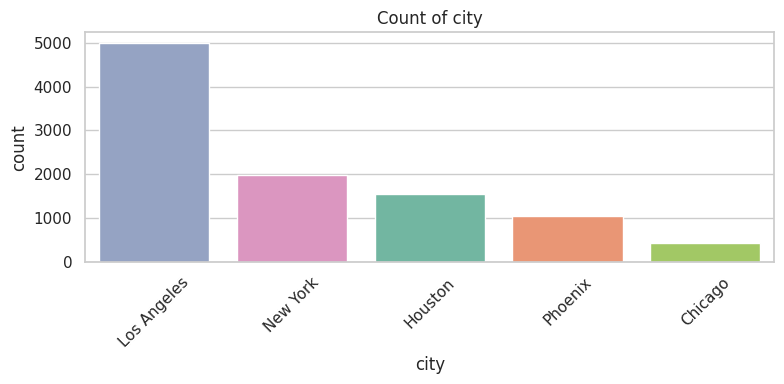

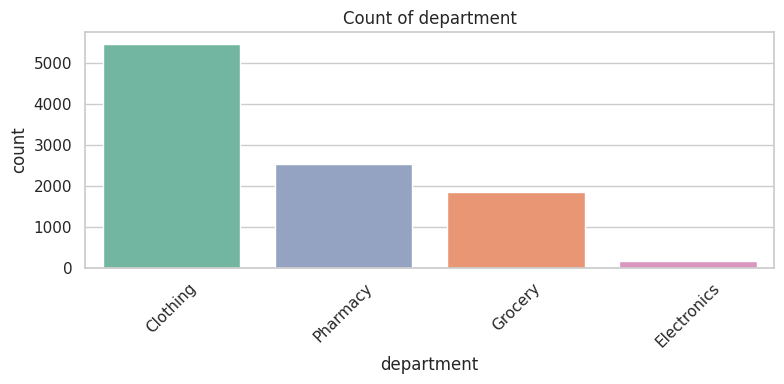

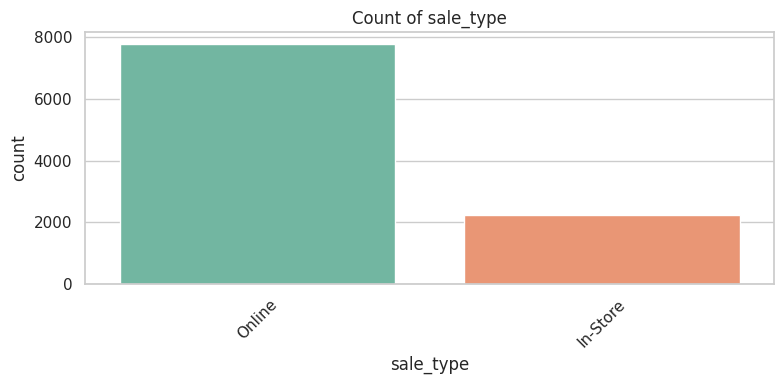

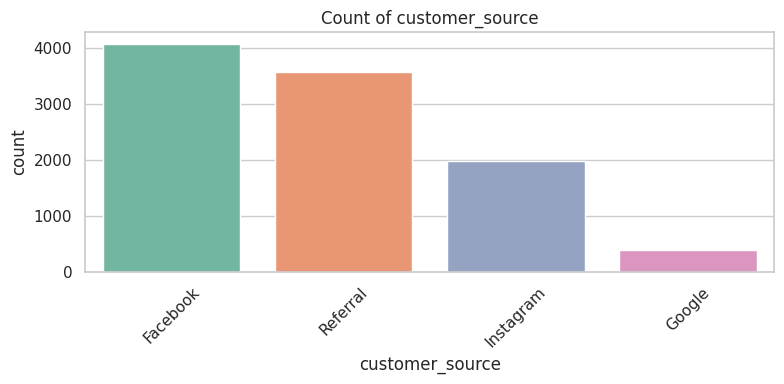

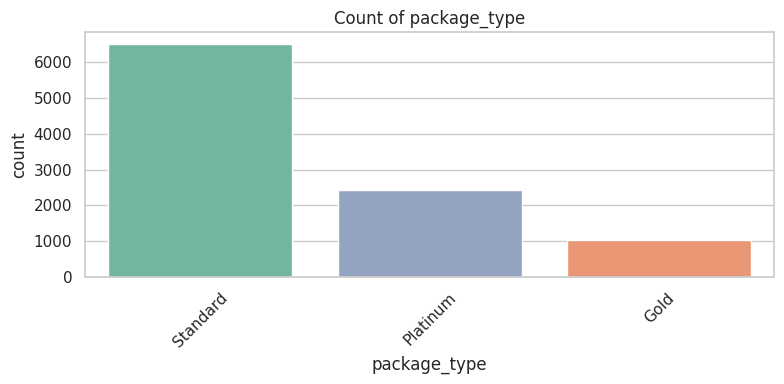

In [ ]:
# Countplots for categorical features
categorical_cols = ['city', 'department', 'sale_type', 'customer_source', 'package_type']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df1, x=col, hue=col, palette='Set2', legend=False,
                  order=df1[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Q: Which city has the most customer interactions?

A: Los Angeles appears most frequently, indicating it has by far the highest customer interaction.

Q: Which department sees the most action?

A: The "Clothing" department sees the most action, far more than Pharmacy or other departments.

Q: What is the distribution of sale types?

A: Online sales account for 77.77% of total transactions, while In-store makes up the remaining 22.23%.

Q: Which customer source is most effective?

A: "Facebook" is the most effective customer source, followed closely by "Referral."

Q: Which package type is most popular?

A: "Standard" packages are the most popular by a large margin compared to Platinum and Gold packages.



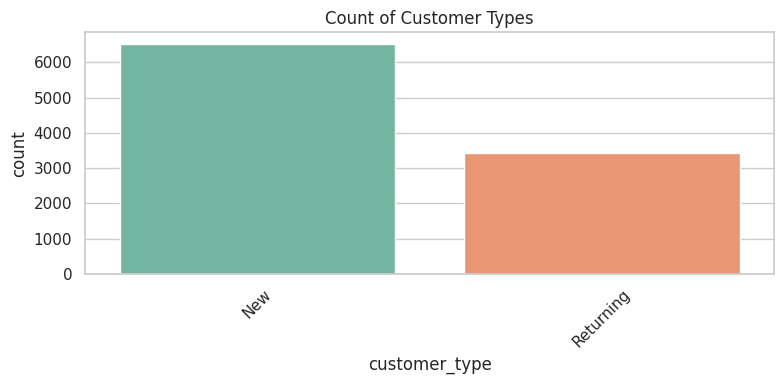

In [ ]:
# Countplot of Customer Types (New vs Returning)

plt.figure(figsize=(8, 4))
sns.countplot(
    data=df1[df1['customer_type'].isin(['New', 'Returning'])],
    x='customer_type',
    hue='customer_type',
    palette='Set2',
    legend=False,
    order=['New', 'Returning']
)
plt.title('Count of Customer Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Q: What does the higher count of new customers imply about business growth?

A: It suggests the business is successfully attracting a large number of new customers, which is a good sign for growth but could also indicate a need to improve customer retention.

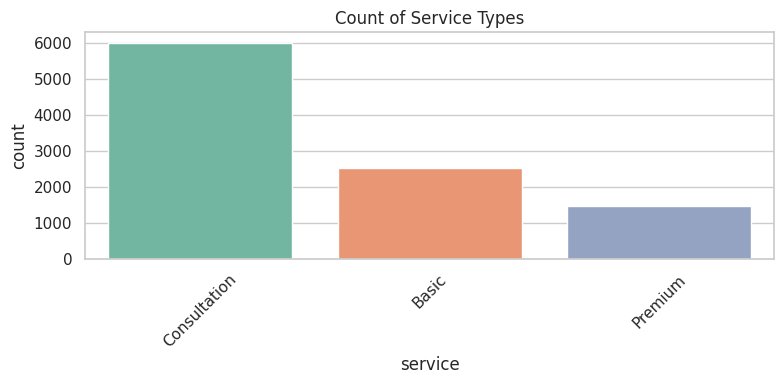

In [ ]:
# Countplot of different service types offered

plt.figure(figsize=(8, 4))
sns.countplot(
    data=df1[df1['service'].isin(['Consultation', 'Basic', 'Premium'])],
    x='service',
    hue='service',
    palette='Set2',
    legend=False,
    order=['Consultation', 'Basic', 'Premium']
)
plt.title('Count of Service Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Q: Which service type is least utilized by customers?

A: "Premium" services are the least utilized, indicating customers may prefer more affordable or simpler service options.

Q: How could the imbalance in service types be addressed?

A: Marketing and promotions could be focused on highlighting the value of "Basic" and "Premium" services to balance customer interest and service distribution.

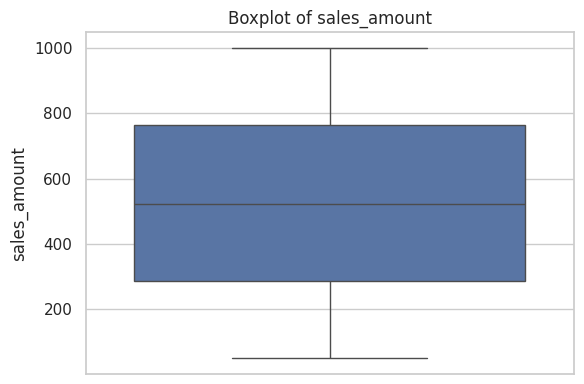

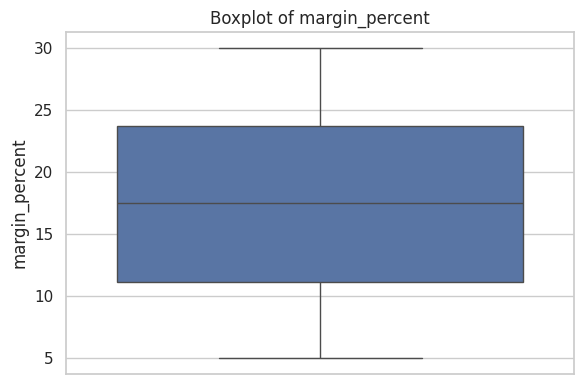

In [ ]:
# Boxplot to detect outliers

numeric_cols = ['sales_amount', 'margin_percent']
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df1, y=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

Q: What does the margin percent distribution tell us about profitability?

A: The margin percent is centered around 17-18%, with most values ranging between 11% and 25%. There are no significant outliers, suggesting consistent and stable profitability margins across transactions.

#Conclusion

Top City: **Los Angeles** leads; New York offers growth potential.

Top Departments: **Clothing and Pharmacy** drive the most engagement.

Customer Mix: New customers dominate; retention efforts needed.

Sales Channels: **Online** outperforms In-Store, making it ideal for launching loyalty programs that reward repeat digital purchases.

Acquisition Sources: **Facebook** leads; Referrals show strong support.

Profit Margins: Stable between **11%–25%.**

Sales Peaks: Highest in June, July, December, especially on Fridays and Saturdays.

I have also created an interactive dashboard for more advanced insights.

Dashboard: https://github.com/Sivadharsini298/Portfolio/blob/main/Visuals/Retail%20Sales%20Dashboard.png